In [127]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st

### Alcohol consumption

In [2]:
st_data = pd.read_csv("files/student-mat.csv", sep=";")
st_data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


Checking observations and variables

In [3]:
st_data.shape

(395, 33)

Checking the type of the data

In [4]:
st_data.dtypes

school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
G1             int64
G2             int64
G3             int64
dtype: object

Instead of saving "GP" and "ML" for school name we can save 0, 1 to save memory

Checking how many are male and female

In [13]:
print("Number of females: ", st_data.sex[st_data.sex == 'F'].count())
print("Number of males: ", st_data.sex[st_data.sex == 'M'].count())
#len(data_alc.sex[data_alc.sex == 'F'])
#data_alc.sex[data_alc.sex == 'F'].size

Number of females:  208
Number of males:  187


Examine by: 
* studytime - weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)
* failures - number of past class failures (numeric: n if 1<=n<3, else 4)

(array([ 105.,    0.,    0.,  198.,    0.,    0.,   65.,    0.,    0.,   27.]),
 array([ 1. ,  1.3,  1.6,  1.9,  2.2,  2.5,  2.8,  3.1,  3.4,  3.7,  4. ]),
 <a list of 10 Patch objects>)

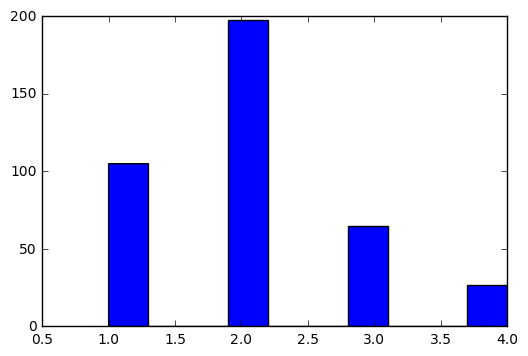

In [14]:
plt.hist(st_data.studytime)

In [15]:
#Length of the unique elements
len(st_data.studytime.unique())

4

[198, 65, 105, 27]


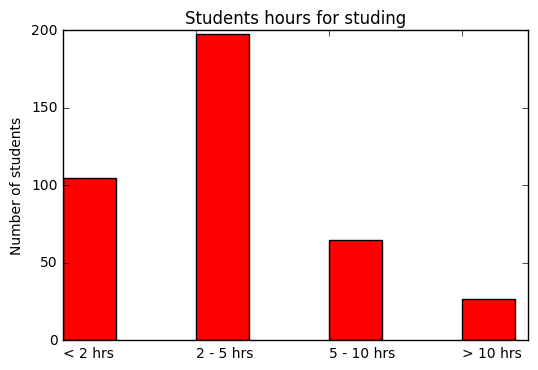

In [16]:
ixs = []
for i in st_data.studytime.unique():
    ixs.append(st_data.studytime[st_data.studytime == i].count())

fig, ax = plt.subplots()
ax.bar(st_data.studytime.unique(), ixs, width=0.4, color='r')
ax.set_ylabel('Number of students')
ax.set_title('Students hours for studing')
ax.set_xticks([2, 3, 1, 4])
ax.set_xticklabels(['2 - 5 hrs', '5 - 10 hrs', '< 2 hrs', '> 10 hrs'],ha='left')
print(ixs)


(array([ 312.,    0.,    0.,   50.,    0.,    0.,   17.,    0.,    0.,   16.]),
 array([ 0. ,  0.3,  0.6,  0.9,  1.2,  1.5,  1.8,  2.1,  2.4,  2.7,  3. ]),
 <a list of 10 Patch objects>)

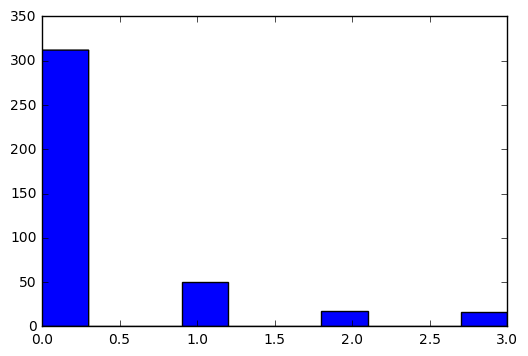

In [17]:
plt.hist(st_data.failures)

We will observe for relation between studytime and failures

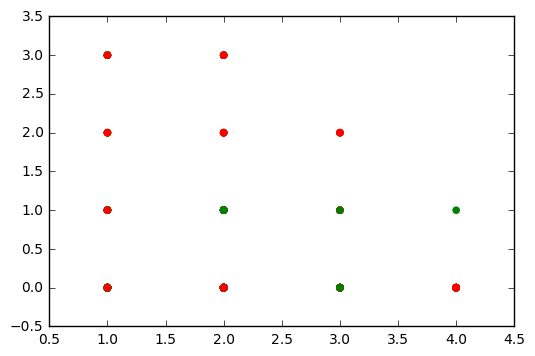

In [18]:
plt.scatter(st_data.studytime,st_data.failures, color='rg')

We have values only by categories that are created. There is no relationship. If you are studing more than 10 hours you cannot fail

We will take the average of the columns - daily alc consumption and weekly

In [19]:
av_alcohol = (st_data.Dalc + st_data.Walc) / 2
av_alcohol.describe()

count    395.000000
mean       1.886076
std        0.992195
min        1.000000
25%        1.000000
50%        1.500000
75%        2.500000
max        5.000000
dtype: float64

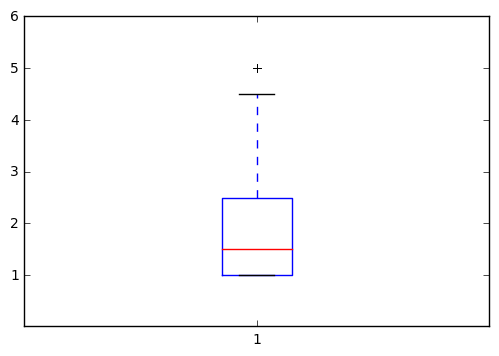

In [20]:
plt.boxplot(av_alcohol)
plt.ylim([0.01,6])
plt.show()

There is a tendency of not drinking too much

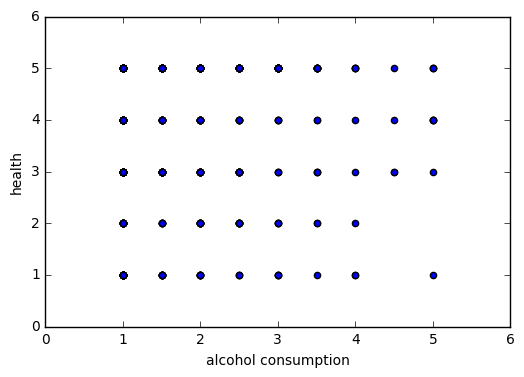

In [21]:
plt.scatter(av_alcohol, st_data.health)
plt.xlabel('alcohol consumption')
plt.ylabel('health')

No relation - we have variables as categories.

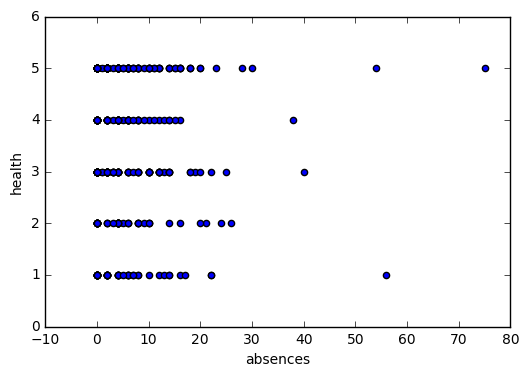

In [22]:
plt.scatter(st_data.absences, st_data.health)
plt.xlabel('absences')
plt.ylabel('health')

The healthiest students has more absences

In [23]:
#av_abcences = st_data.groupby("health").sum()["absences"]
av_abcences = st_data.groupby("health").mean()["absences"]
av_abcences

health
1    6.319149
2    5.955556
3    5.857143
4    5.045455
5    5.643836
Name: absences, dtype: float64

In [ ]:
plt.bar(list(np.arange(len(av_abcences))),av_abcences)

#plt.labels(['a', 'b', 'c', 'd', 'e'],ha='left')

We will remove the outliers for better picture

In [24]:
filter_abcences = st_data[st_data.absences < 35]
print("Number of outliers that will be removed: ", len(st_data.absences) - filter_abcences.count().absences)

Number of outliers that will be removed:  5


(0, 6)

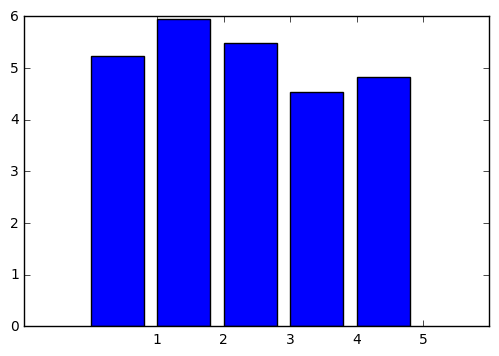

In [106]:
av_abcences_without_outliers = filter_abcences.groupby("health").mean()["absences"]


plt.bar(list(np.arange(len(av_abcences_without_outliers))),av_abcences_without_outliers)
x = [1, 2, 3, 4, 5]
labels = np.arange(1,6)
plt.xticks(x, labels)
#plt.tick_params(axis='x', direction='center',  pad=-40)
plt.xlim([-1,6])
plt.ylim([0,6])


We cannot see anything meaningful, so will will pring the same by sum 

<Container object of 5 artists>

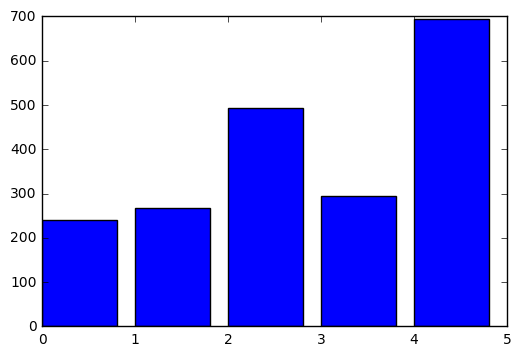

In [26]:
av_abcences_without_outliers_by_sum = filter_abcences.groupby("health").sum()["absences"]
plt.bar(list(np.arange(len(av_abcences_without_outliers_by_sum))),av_abcences_without_outliers_by_sum)
plt.xlabel()

Peaople that are healty are abcent by other reasons - health cannot be predictable for number of abcences. we have unbalanced data - in the different groups we have different number of students

Checking the students' grades

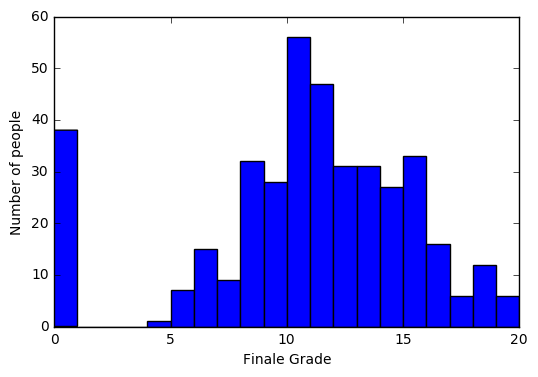

In [119]:
plt.hist(st_data.G3, bins=20)
plt.ylabel('Number of people')
plt.xlabel('Finale Grade')

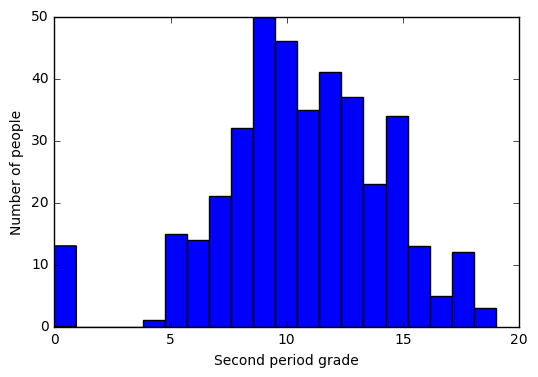

In [121]:
plt.hist(st_data.G2, bins=20)
plt.ylabel('Number of people')
plt.xlabel('Second period grade')

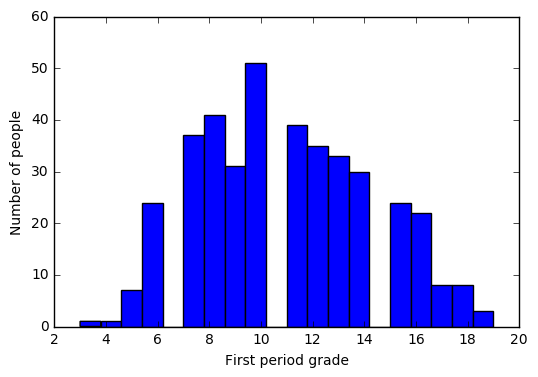

In [118]:
plt.hist(st_data.G1, bins=20)
plt.ylabel('Number of people')
plt.xlabel('First period grade')

Second and final grade looks more related 

Making a scater plot 

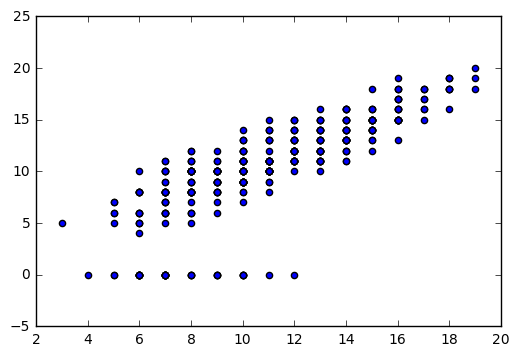

In [124]:
plt.scatter(st_data.G1, st_data.G3)

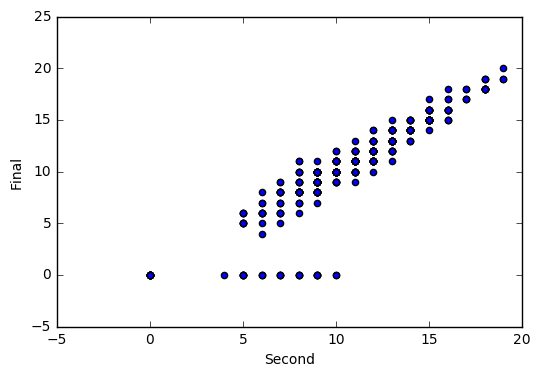

In [126]:
plt.scatter(st_data.G2, st_data.G3)
plt.xlabel("Second")
plt.ylabel("Final")

In [139]:
per = st.pearsonr(st_data.G1, st_data.G3)
#print("Coeff corr: {:.2f}".format(per[0]))
#print("Significance val: {:.20f}".format(per[1]))
#import numpy
#numpy.corrcoef(list1, list2)[0, 1]
print("Coeff corr first period grade: {:.2f}".format(per[0]))

Coeff corr first period grade: 0.80


In [140]:
per = st.pearsonr(st_data.G2, st_data.G3)
print("Coeff corr second period grade: {:.2f}".format(per[0]))

Coeff corr second period grade: 0.90


We can say that the grade at the second period correlates stronger than the grade for the first period